In [1]:
from mermaid import Mermaid
Mermaid("graph TD; A-->B; A-->C; B-->D; C-->D;")

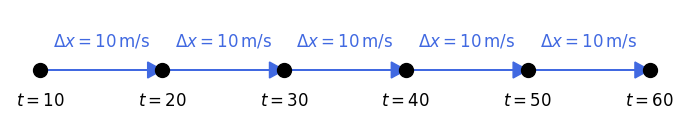

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Number of points
n_points = 6
x = np.arange(n_points) * 1.5  # space out the points
y = np.zeros(n_points)

fig, ax = plt.subplots(figsize=(7, 1.5))

# Draw points
ax.plot(x, y, 'ko', markersize=10)

# Draw arrows (displacement vectors) from dot to dot
for i in range(n_points - 1):
    ax.arrow(x[i], y[i], x[i+1] - x[i], 0, head_width=0.08, head_length=0.18, fc='royalblue', ec='royalblue', length_includes_head=True)
    ax.text((x[i] + x[i+1]) / 2, 0.12, r"$\Delta x = 10\,\mathrm{m/s}$", color='royalblue', fontsize=12, ha='center')

# Time labels (t=10, t=20, ...)
time_labels = [f"$t={10*(i+1)}$" for i in range(n_points)]
for i in range(n_points):
    ax.text(x[i], -0.18, time_labels[i], fontsize=12, ha='center')

ax.set_ylim(-0.3, 0.3)
ax.axis('off')
plt.tight_layout()
plt.show()


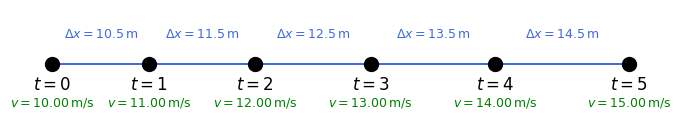

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n_points = 6
x0 = 0
v0 = 10  # initial velocity (m/s)
a = 1.0  # acceleration (m/s^2)
dt = 1  # time step (s)

# Calculate positions at each time step
times = np.arange(n_points) * dt
positions = x0 + v0 * times + 0.5 * a * times**2
velocities = v0 + a * times

# Move the timeline lower
y_timeline = -0.15

y = np.full(n_points, y_timeline)

fig, ax = plt.subplots(figsize=(7, 1.5))

# Draw points
ax.plot(positions, y, 'ko', markersize=10)

# Draw arrows (displacement vectors) from dot to dot, with increasing length
for i in range(n_points - 1):
    dx = positions[i+1] - positions[i]
    # Average velocity for the interval
    v1 = velocities[i]
    v2 = velocities[i+1]
    v_avg = 0.5 * (v1 + v2)
    ax.arrow(positions[i], y[i], dx, 0, head_width=0.08, head_length=0.18, fc='royalblue', ec='royalblue', length_includes_head=True)
    # Raise Δx and velocity labels
    ax.text(positions[i] + dx/2, y_timeline + 0.22, fr"$\Delta x = {dx:.1f}\,\mathrm{{m}}$", color='royalblue', fontsize=9, ha='center')
    
# Time labels  lower than timeline
ax.set_ylim(-0.7, 0.3)
time_labels = [f"$t={int(t)}$" for t in times]
for i in range(n_points):
    ax.text(positions[i], y_timeline - 0.22, time_labels[i], fontsize=12, ha='center')
    # Velocity at each time t, below the time label
    ax.text(positions[i], y_timeline - 0.35, fr"$v = {velocities[i]:.2f}\,\mathrm{{m/s}}$", color='green', fontsize=9, ha='center')

ax.axis('off')
plt.tight_layout()
plt.show()


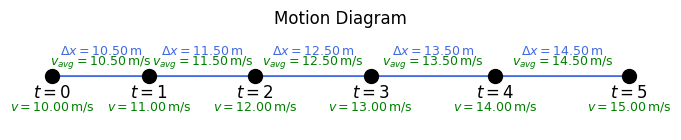

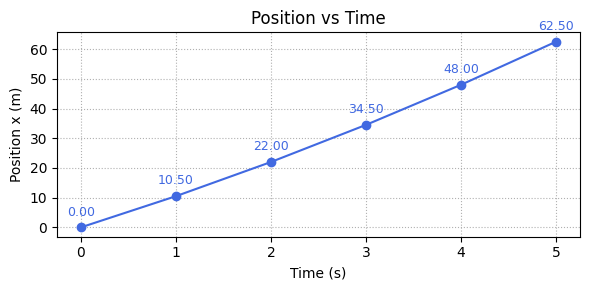

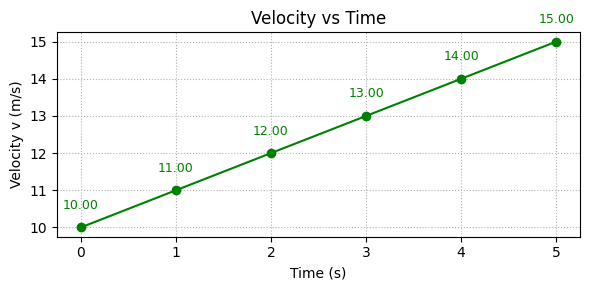

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def motion_diagram_tl(n_points=6, x0=0, v0=10, a=1.0, dt=1):
    """
    Draw a motion diagram for an object with constant acceleration.
    Args:
        n_points (int): Number of time points
        x0 (float): Initial position (m)
        v0 (float): Initial velocity (m/s)
        a (float): Acceleration (m/s^2)
        dt (float): Time step (s)
    """
    times = np.arange(n_points) * dt
    positions = x0 + v0 * times + 0.5 * a * times**2
    velocities = v0 + a * times

    # Move the timeline lower
    y_timeline = -0.15
    y = np.full(n_points, y_timeline)

    fig, ax = plt.subplots(figsize=(7, 1.5))

    # Draw points
    ax.plot(positions, y, 'ko', markersize=10)

    # Draw arrows (displacement vectors) from dot to dot, with increasing length
    for i in range(n_points - 1):
        dx = positions[i+1] - positions[i]
        # Average velocity for the interval
        v1 = velocities[i]
        v2 = velocities[i+1]
        v_avg = 0.5 * (v1 + v2)
        ax.arrow(positions[i], y[i], dx, 0, head_width=0.08, head_length=0.18, fc='royalblue', ec='royalblue', length_includes_head=True)
        # Raise Δx and velocity labels
        ax.text(positions[i] + dx/2, y_timeline + 0.22, fr"$\Delta x = {dx:.2f}\,\mathrm{{m}}$", color='royalblue', fontsize=9, ha='center')
        ax.text(positions[i] + dx/2, y_timeline + 0.12, fr"$v_{{avg}} = {v_avg:.2f}\,\mathrm{{m/s}}$", color='green', fontsize=9, ha='center')

    # Time labels (t=0, t=1, t=2, ...), lower than timeline
    ax.set_ylim(-0.7, 0.3)
    time_labels = [f"$t={int(t)}$" for t in times]
    for i in range(n_points):
        ax.text(positions[i], y_timeline - 0.22, time_labels[i], fontsize=12, ha='center')
        # Velocity at each time t, below the time label
        ax.text(positions[i], y_timeline - 0.35, fr"$v = {velocities[i]:.2f}\,\mathrm{{m/s}}$", color='green', fontsize=9, ha='center')

    ax.axis('off')
    plt.title("Motion Diagram")
    plt.tight_layout()
    plt.show()

def motion_diagram_lcx(n_points=6, x0=0, v0=10, a=1.0, dt=1):
    """
    Plot x (position) vs time for an object with constant acceleration.
    """
    times = np.arange(n_points) * dt
    positions = x0 + v0 * times + 0.5 * a * times**2
    plt.figure(figsize=(6, 3))
    plt.plot(times, positions, 'o-', color='royalblue')
    for t, x in zip(times, positions):
        plt.text(t, x + 4, f"{x:.2f}", ha='center', fontsize=9, color='royalblue')
    plt.xlabel('Time (s)')
    plt.ylabel('Position x (m)')
    plt.title('Position vs Time')
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

def motion_diagram_lcv(n_points=6, x0=0, v0=10, a=1.0, dt=1):
    """
    Plot velocity vs time for an object with constant acceleration.
    """
    times = np.arange(n_points) * dt
    velocities = v0 + a * times
    plt.figure(figsize=(6, 3))
    plt.plot(times, velocities, 'o-', color='green')
    for t, v in zip(times, velocities):
        plt.text(t, v + 0.5, f"{v:.2f}", ha='center', fontsize=9, color='green')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity v (m/s)')
    plt.title('Velocity vs Time')
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

def motion_diagram(n_points=6, x0=0, v0=10, a=1.0, dt=1):
    motion_diagram_tl(n_points=n_points, x0=x0, v0=v0, a=a, dt=dt)
    motion_diagram_lcx(n_points=n_points, x0=x0, v0=v0, a=a, dt=dt)
    motion_diagram_lcv(n_points=n_points, x0=x0, v0=v0, a=a, dt=dt)
    

motion_diagram(n_points=6, x0=0, v0=10, a=1.0, dt=1)


